## Inteligencia Artificial para la Ciencia de los Datos

## Máster en Lógica, Computación e Inteligencia Artificial 

In [136]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Práctica 2 con scikit learn

Vamos a mostrar aquí como  cargar un conjunto de datos que ya existe en scikit_learn, y cómo aplicarle un clasificador (knn en este caso), y evaluando el rendimiento. 

## Carga de datos: iris

Para nuestros ejemplos, usremos el conjunto de datos de la flor de iris, disponible en scikit-learn como uno de los conjuntos predefinidos de la biblioteca

#### Ejercicio 1

Cargar el conjunto de datos del iris en una variable `iris`. Mostrar el número de ejemplos y de columnas, los nombres de las caractaerísticas y los nombres de las posibles clases (indicación: consultar `load_iris` en el manual).

In [137]:
# === Solución
from sklearn.datasets import load_iris


In [138]:
# Datos
iris = load_iris()

In [139]:
# Número de filas y columnas
iris.data.shape


(150, 4)

In [140]:
# Nombre de las cuatro columnas:

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [141]:
# Nombre de las clases:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [142]:
# Valores de clasificación de cada ejemplo
# 0:setosa, 1:versicolor, 2:virginica 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [143]:
# Cargamos los datos en variables X_iris, y_iris
# En X_names, y_names los nombres de las columnas y las clases, resp.
x_iris, y_iris = iris.data, iris.target
x_names, y_names = iris.feature_names, iris.target_names




## Visualización de los datos 


#### Ejercicio 2

Puesto que los datos son 4-dimensionales, para tener algún tipo de visualización, puede ser interesante tener representaciones 2D en las que tenemos en cuanta sólo dos de las cuatro características. 

Por ejemplo, hacer en una única gráfica tres nubes de puntos. Cada punto representa un ejemplo del conjunto de datos, con coordenadas dadas resectivamente por la longitud y la anchura de sépalo. Los puntos de cada clase se distinguen por su color y su forma. Por ejemplo:

<img src="https://www.cs.us.es/~jruiz/repository/iris.png">

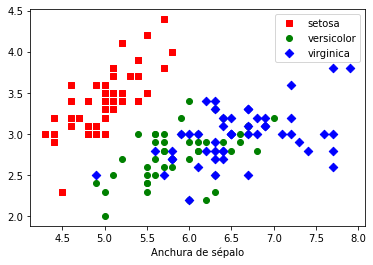

In [144]:
# ==== Solución:
# la columna cero que cumple en y_iris es cero
x_iris[y_iris==0,0]
plt.scatter(x_iris[y_iris==0,0], x_iris[y_iris==0,1], marker="s",c="r")
plt.scatter(x_iris[y_iris==1,0], x_iris[y_iris==1,1], marker="o",c="g")
plt.scatter(x_iris[y_iris==2,0], x_iris[y_iris==2,1], marker="D",c="b")
plt.xlabel("Longitud de sépalo")
plt.xlabel("Anchura de sépalo")
plt.legend(y_names)
# aca solo etsamos viendo 2 caracteristicas y solo en esas 2 parece que setosa es facil de separar pero las otras dos caracteristicas no son tan facile sd eseparar


#### Ejercicio 3

Definir una función:

  `representacion_grafica_iris(c1,c2)`
  
que generalice la construcción de la gráfica anterior, permitiendo dar las columnas `c1` y `c2` (sus índices) que indican que dos características se usan como coordenadas en la representación 2D.

Por ejemplo, `representacion_grafica_iris(0,1)` mostraría el gráfico anterior.

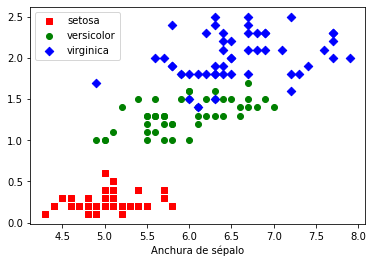

In [145]:
# === Solución:
def representacion_grafica_iris(c1,c2):
    plt.scatter(x_iris[y_iris==0,c1], x_iris[y_iris==0,c2], marker="s",c="r")
    plt.scatter(x_iris[y_iris==1,c1], x_iris[y_iris==1,c2], marker="o",c="g")
    plt.scatter(x_iris[y_iris==2,c1], x_iris[y_iris==2,c2], marker="D",c="b")
    plt.xlabel("Longitud de sépalo")
    plt.xlabel("Anchura de sépalo")
    plt.legend(y_names)
    

representacion_grafica_iris(0,3)

## Separación de los datos

#### Ejercicio 4

Separar el total de datos en entrenamiento y prueba (75%-25%)

In [146]:
# === Solución
from sklearn.model_selection import train_test_split
# como los datos vienen en datos y nombres, hay que partir los 2 en simultaneo
x_train, x_test, y_train, y_test=train_test_split(x_iris, y_iris, test_size=0.25, random_state=1, stratify=y_iris)
# lo ponemos en uno al random para ver igual que el profe, lo correcto es que sea menor 

In [147]:
# conjunto de datos estratificados
import numpy as np
np.unique(y_train, return_counts=True)



(array([0, 1, 2]), array([38, 37, 37], dtype=int64))

## Normalización de los datos

Frecuentemente no todas las características son de la misma magnitud, lo que puede interferir en la precisión de los modelos aprendidos. En scikit-learn podemos normalizar los datos   

Un normalizador que se usa con frencuencia es el normalizador estándar, que ajusta cada caractarística para que su media sea cero y su desviación típica 1.

#### Ejercicio 5

Normalizar los datos usando `StandardScaler`

In [148]:
# === Solución:
from sklearn.preprocessing import StandardScaler
# Crear y ajustar el normalizador
#x_scaled = StandardScaler().fit_transform(x_train)
normalizador = StandardScaler().fit(x_train)


Podemos incluso acceder a los parámetros que se han "aprendido" tras hacer fit, ya que quedan guardado en un par de atributos del objeto normalizador:

In [149]:
# Imprimir las medias y desviaciones típicas calculadas
x_scaled

StandardScaler()

Ahora podemos aplicar el método transform para normalizar cualquier conjunto de datos, usnado los parámetros calculados:

In [150]:
# Transformar los datos
Xn_train=normalizador.transform(x_train)



In [154]:
# Comprobar las nuevas media y desviación típica de los datos normalizados
# lo que hace es el axis 0 eje de las filas hace cada columna y pobtiene la media
print(Xn_train.mean(axis=0))
print(Xn_train.mean(axis=1))


[ 0.61711242 -0.43086994  0.25987044  1.19056259  0.1714524   0.18266944
 -0.93335848 -0.80168272  1.16584313  0.91441744 -0.97375289 -0.05039218
  1.01359563  0.46871986 -0.62124896 -0.41977445 -1.4842593  -0.92002744
 -0.97692434  0.55356272 -0.01769536 -0.52113487  0.28546037 -0.26546522
 -1.13887491  0.75994962 -0.41951961 -0.58234065  1.06069563  0.58480131
 -0.9188367   1.45606913 -0.60343472 -0.52137464  0.42919591  0.1453
  0.20080396  0.98265203  0.54589299  0.61151655 -0.1924273   0.58860346
  0.49750858  0.2726918   0.9476518   0.58593926 -0.31687462  1.70753533
 -0.15493912  0.112053   -0.89151848 -0.67024901 -0.32477147 -0.65449597
  0.87170698 -0.9042744   0.85553999 -1.02245758 -0.4234677  -0.06676085
  0.84879389 -0.19894628 -0.99337351 -0.03582989 -0.85820603 -0.51639682
  0.4387248   0.34247829 -0.19355261 -0.37051957 -0.59747806 -0.77206353
  0.13196897  0.48494206  0.1705165   0.14493922 -0.21132634  1.06930126
 -0.55325657 -0.48693689  0.7139872   0.05735113 -0.288

## Clasificador Knn

#### Ejercicio 6

Aplicar a los datos normalizados el clasificador Knn (`KNeighborsClassifier`) con n=7, y medir el rendimiento dobre el conjunto de entrenamiento

In [167]:
# ==== Solución
from sklearn.neighbors import KNeighborsClassifier
Knn7_iris=KNeighborsClassifier(n_neighbors=7)
# Crear el clasificador

Lo entrenamos, con los datos normalizados. Obsérvese cómo el resultado de entrenar es el propio clasificador:

In [168]:
# Entrenarlo
Knn7_iris.fit(Xn_train, y_train)
# de etsa form le pasamos los datos de entrenamiento a una precalculo de Knn

KNeighborsClassifier(n_neighbors=7)

In [169]:
# Medir el rendimiento sobre el conjunto de entrenamiento
Knn7_iris.predict(Xn_train), y_train
Knn7_iris.score(Xn_train, y_train)
# con n_neighbors da 100% pero es inutil porque de uan forma estas haciendo sobreajuste


0.9642857142857143

#### Ejercicio 7

Comparar las predicciones que hace el clasificador sobre el conjunto de test, respecto de las reales. Medir el rendimiento del clasificador sobre el conjunto de test

In [172]:
# ==== Solución:

# Predicciones:
# para normalizar el test no se debe usar el test, hay que usar el entrenamiento (trasladado y escalado)
Xn_test=normalizador.transform(x_test)
Knn7_iris.score(Xn_test, y_test)
# Es normal que ontengamos mejor en train que en test


0.9473684210526315

Las clases reales son las siguientes:

In [20]:
# Clases reales:



Como se observa, la predicción ha sido bastante buena. El método score del clasificador (que calcula el porcentaje de ejemplos cuya predicción es la correcta), nos lo confirma:

In [21]:
# Dar el rendimiento sobre test



## Datos del cancer de mama

Los datos *UCI ML Breast Cancer Wisconsin* son datos que clasifican imágenes de tumores en el pecho, en malignos y benignos, junto con una serie de características tomadas de la imagen (radio, textura,...) Son en total 569 datos con 30 características.

En scikit learn están accesibles con `load_breast_cancer`. 

#### Ejercicio 8

Aplicar Knn (con n=5) a dicho conjunto. Separar en entrenamiento y prueba, y normalizar previamente, como en el ejercicio anterior. Calcular el rendimiento, tanto sobre entrenamiento como con prueba. 

In [22]:
# === Solución:
# hacer lo mismoq ue lo anteriorpero en uan soa celda






#### Ejercicio 9

Dibujar una gráfica (mediante `plot` de `matplotlib.pyplot`) en el que se muestre como evoluciona el rendimiento del clasificador knn en función del número de vecinos (de 1 a 10), tanto en entrenamiento como en test.

Comentar el resultado de la gráfica.

In [23]:
# === Solución
# cuando aumente los vecimos va a ir bajando
# sin embargo el test a mayor vecinos va a ir aumentando
# perdemos en el entrenamiento y ganamos en datos independiente

